In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
hrt = pd.read_csv('heart.csv')
hrt.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,NaN,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [15]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             915 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [10]:
hrt.shape

(918, 12)

In [11]:
hrt.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,914.000000,915,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,723,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.553611,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.424972,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [12]:
#Checking for null value
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
#Removing null values from age column
avg_age = np.mean(hrt['Age'])
hrt['Age'].fillna(avg_age, inplace=True)

In [14]:
#Removing null values from Sex column
hrt['Sex'].value_counts()

Sex
M    723
F    192
Name: count, dtype: int64

In [9]:
hrt['Sex'].fillna('M',inplace = True)

hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Exploratory Data Analysis(EDA)

In [10]:
cp = hrt['ChestPainType'].value_counts()
cp

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

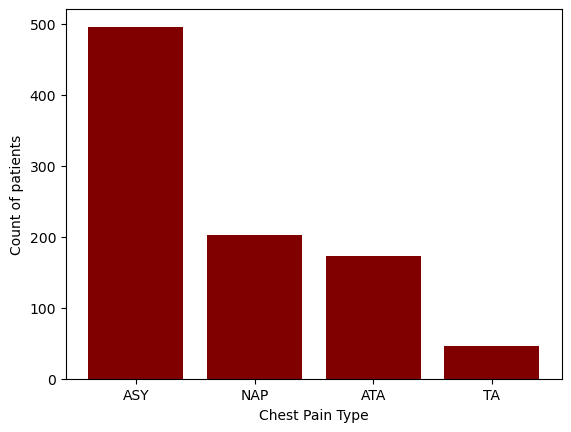

In [11]:
plt.bar(cp.index, cp.values, color = 'Maroon')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of patients')
plt.show()

Above graph shows that maximum patients suffer from ASY type of chest pain and minimum are recoreded with TA type of chest pain

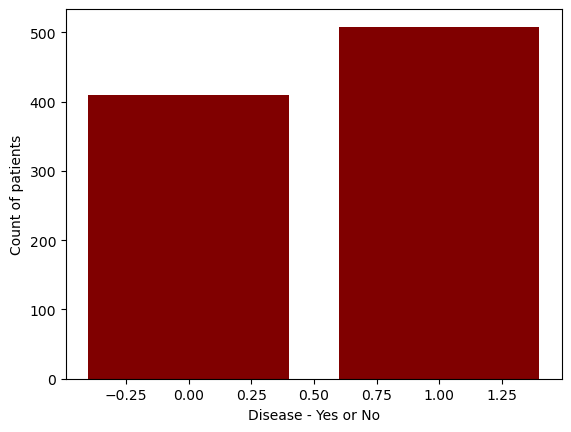

In [12]:
HeartDis = hrt['HeartDisease'].value_counts()
plt.bar(HeartDis.index, HeartDis.values, color = 'Maroon')
plt.xlabel('Disease - Yes or No')
plt.ylabel('Count of patients')
plt.show()

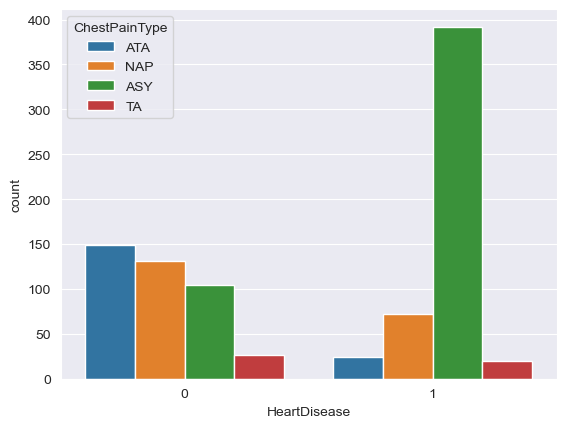

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='HeartDisease',hue='ChestPainType', data = hrt)
plt.show()

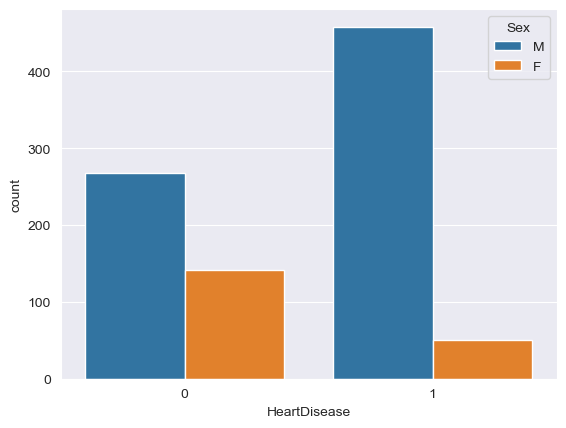

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='HeartDisease',hue='Sex', data = hrt)
plt.show()

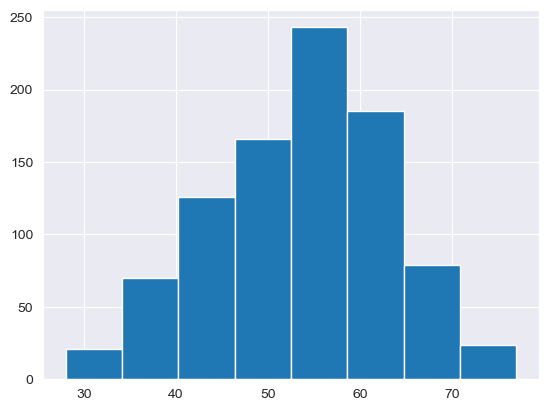

In [37]:
plt.hist(hrt['Age'], bins=8)
plt.show()

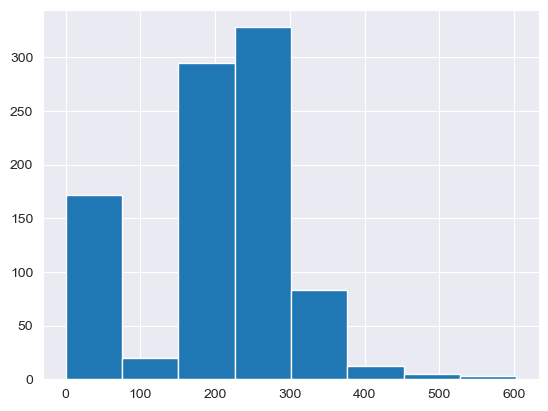

In [35]:
plt.hist(hrt['Cholesterol'], bins=8)
plt.show()

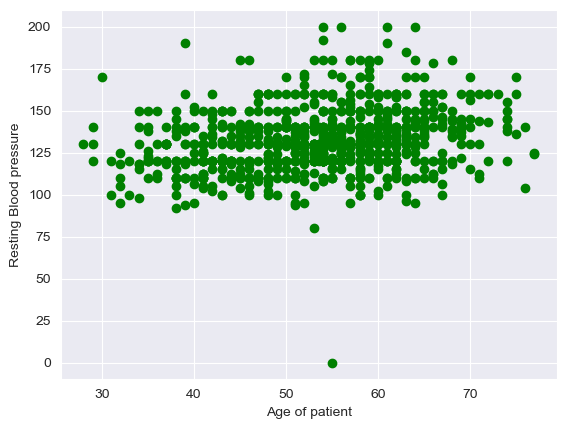

In [17]:
plt.scatter(hrt['Age'], hrt['RestingBP'], color = 'Green')
plt.xlabel('Age of patient')
plt.ylabel('Resting Blood pressure')
plt.show()

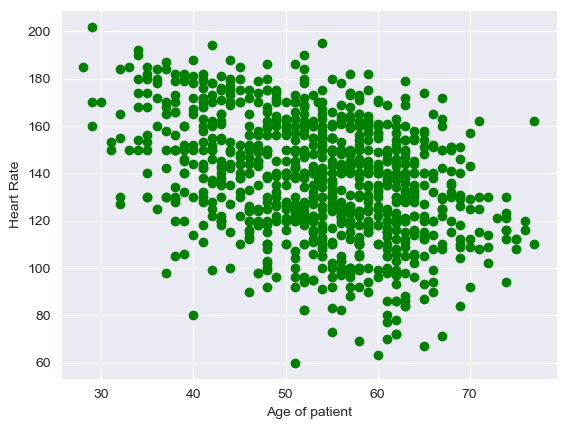

In [18]:
plt.scatter(hrt['Age'], hrt['MaxHR'], color = 'Green')
plt.xlabel('Age of patient')
plt.ylabel('Heart Rate')
plt.show()

In [19]:
#Encoding non numeric columns
from sklearn.preprocessing import LabelEncoder

In [20]:
encode = LabelEncoder()
hrt['Sex'] = encode.fit_transform(hrt['Sex'])
hrt['ChestPainType'] = encode.fit_transform(hrt['ChestPainType'])
hrt['RestingECG']= encode.fit_transform(hrt['RestingECG'])
hrt['ExerciseAngina']= encode.fit_transform(hrt['ExerciseAngina'])
hrt['ST_Slope']= encode.fit_transform(hrt['ST_Slope'])

In [21]:
#Input and output split
X = hrt.iloc[: , : -1]
y = hrt.iloc[: , -1]

In [22]:
print(X.shape)
print(y.shape)

(918, 11)
(918,)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

86.41304347826086

In [26]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y_test, y_pred)

array([[ 55,  13],
       [ 12, 104]], dtype=int64)

In [27]:
#Applying Decision tree over the data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)
y_pred =model.predict(x_test)
accuracy_score(y_test,y_pred)*100

80.43478260869566

In [28]:
confusion_matrix(y_test, y_pred)

array([[50, 18],
       [18, 98]], dtype=int64)

## K-NN algoritnm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)*100

72.82608695652173

### Hyper parameter tunning
-Changing various values of k to find changes in accuracies

In [30]:
k_values = [1,2,3,4,5,6,7,8]
accuriacies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuriacies.append(acc)

In [31]:
accuriacies

[0.6847826086956522,
 0.657608695652174,
 0.717391304347826,
 0.717391304347826,
 0.7282608695652174,
 0.7282608695652174,
 0.7391304347826086,
 0.7119565217391305]

## Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)*100

77.17391304347827

### The highest accuracy is shown by Logistic regression and Decision tree